In [2]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib as plt

%matplotlib inline

pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('data/drugsComTrain_raw.tsv',sep='\t')


In [4]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [5]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [6]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure') | (df['condition']=='Diabetes, Type 2')]
x = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [7]:
x.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

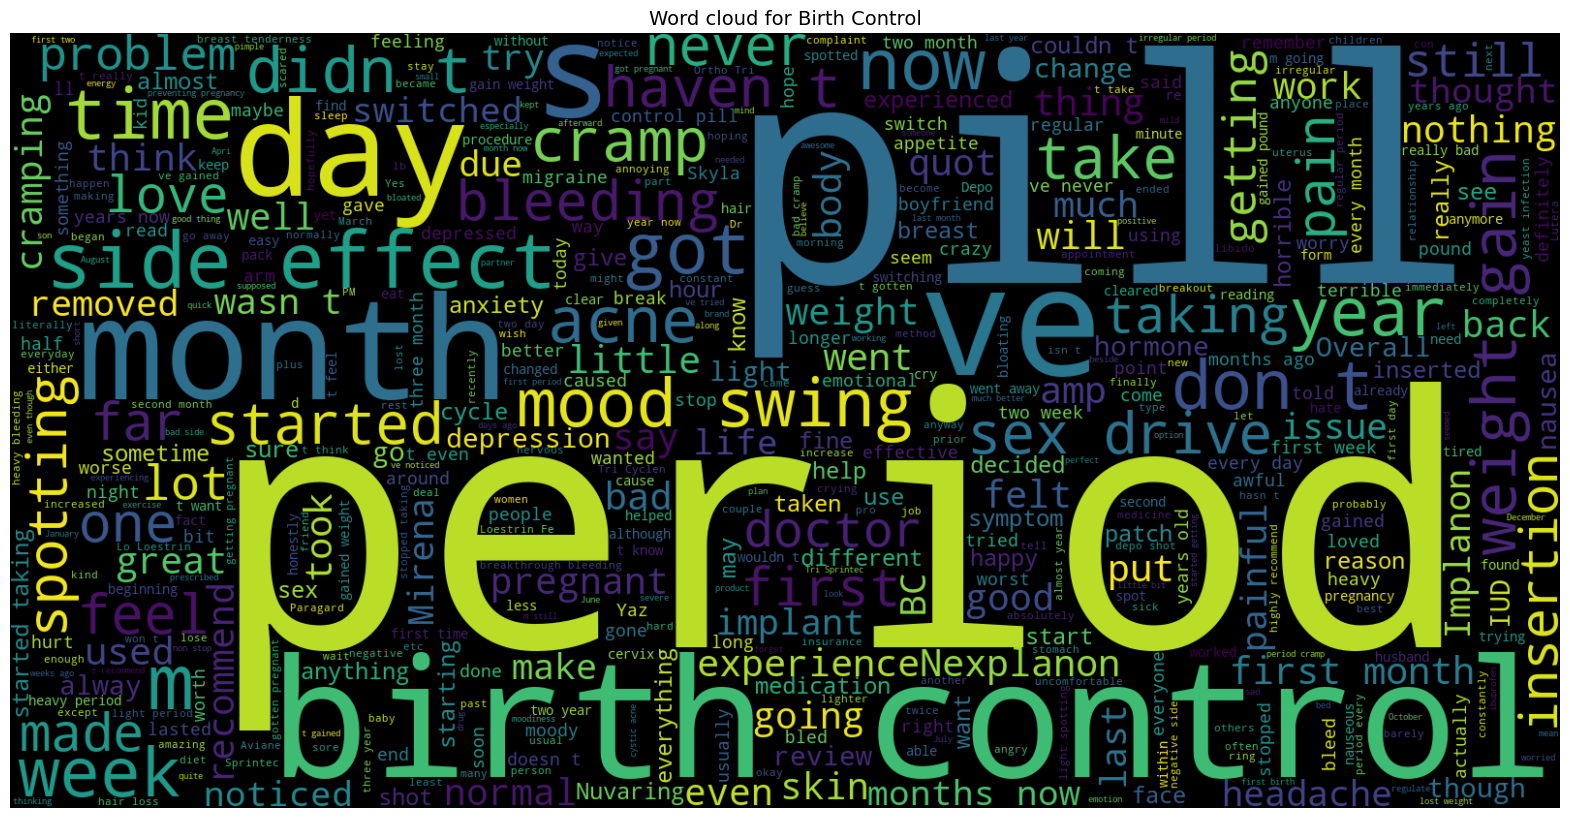

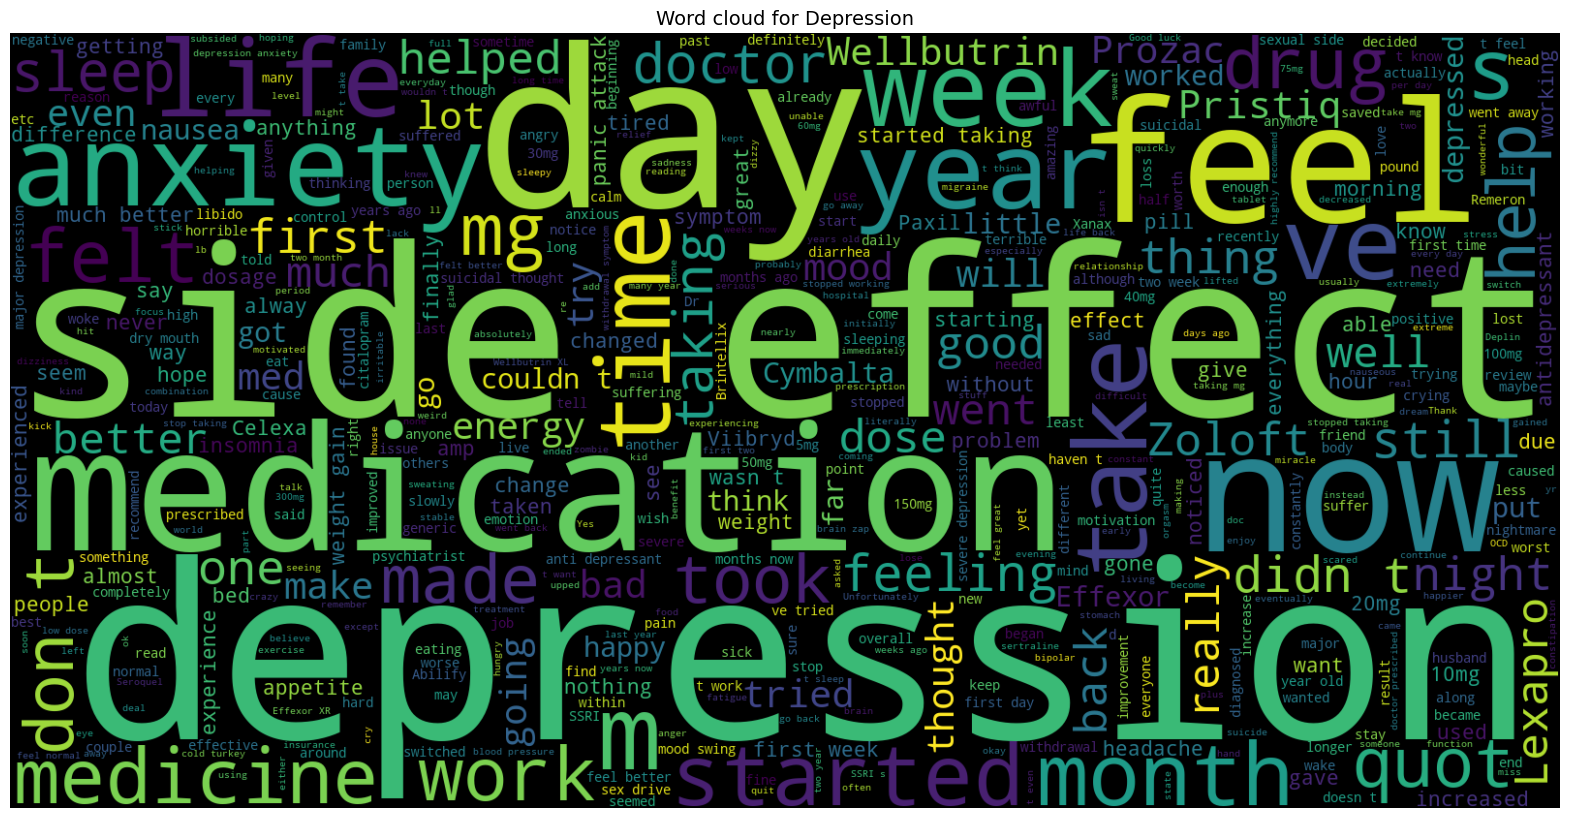

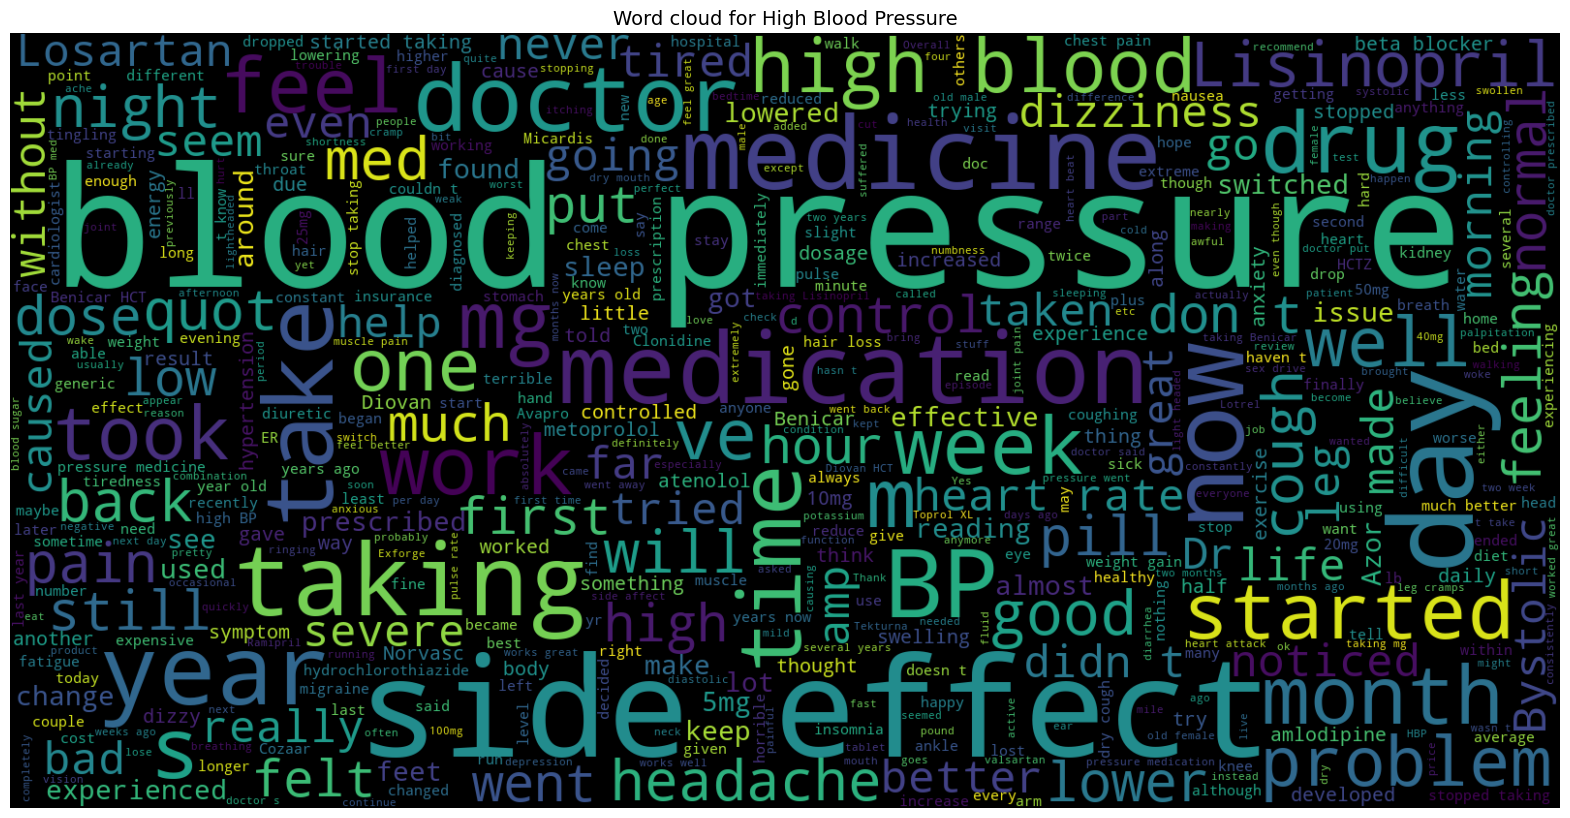

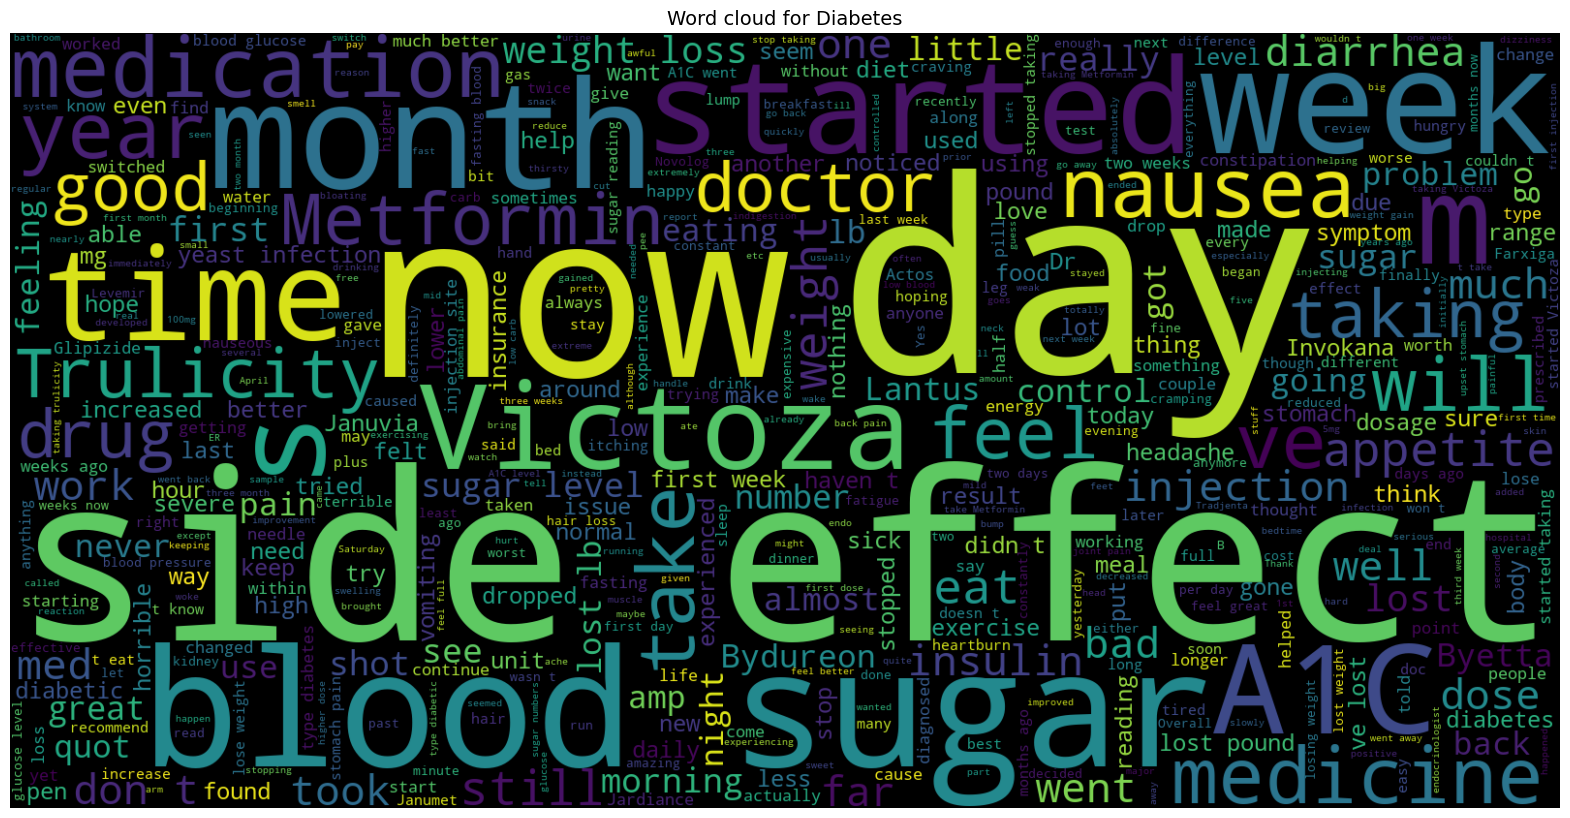

In [8]:
x_birth = x[x['condition']=='Birth Control']
x_dep = x[x['condition']=='Depression']
x_bp = x[x['condition']=='High Blood Pressure']
x_diab = x[x['condition']=='Diabetes, Type 2']

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Birth Control word frequency displayed
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_birth.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth Control', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()

#Depression word count displayed
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_dep.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()

#High Blood Pressure word frequency
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_bp.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for High Blood Pressure', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()

#Diabetes word frequency
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_diab.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Diabetes', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()


In [9]:

for i,col in enumerate(x.columns):
    x.iloc[:,i] = x.iloc[:,i].str.replace('"','')

pd.set_option('max_colwidth',None)

import nltk
#nltk.download()

from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer()

from bs4 import BeautifulSoup
import re

def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z] ',' ',review_text)
    words = letters_only.lower().split()
    meaningful_words=[w for w in words if not w in stop]
    lemmetized_words=[lemmetizer.lemmatize(w) for w in meaningful_words]
    cleaned_output = " ".join(lemmetized_words)
    return cleaned_output

x['review_clean'] = x['review'].apply(review_to_words)
x.head()


/var/folders/09/ctwsqpsd37g5fwsnk2rn_qpr0000gp/T/ipykernel_3071/2702008560.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,'html.parser').get_text()


condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.   
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months no

In [10]:
x_feat = x['review_clean']
y = x['condition']

x_train,x_test,y_train,y_test = train_test_split(x_feat,y,stratify=y,test_size=0.2,random_state=0)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1,3))
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train,y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test,pred)
print(f"accuracy: {score}")

accuracy: 0.9858429858429858


In [12]:
x.tail()

condition  \
161273        Birth Control   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   
161291        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161278                                                                                                                                                                                                                                                                                                                                                                                                   I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me   
161286                                                                                                                                                                                                                                                                                                                                                                                         This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.   
161290                                                                                                                                                                                  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.   
161291                                                                                                                                                                                                                          This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(   

                                                                                                                          

In [13]:
text = ["nexplanon since dec 27 201 got first period end january lasted month half march 201 bleed close three week started bleeding march 28th bleeding every since gained 1 lb far since getting birth control although weight gain deal breaker bleeding is. trying patient see body adjusts implant three month far finger crossed cycle go away awhile."]
test = tfidf_vectorizer.transform(text)
pred = pass_tf.predict(test)[0]
pred

np.str_('Birth Control')

In [14]:
def top_drugs_extractor(condition,df):
    df_top = df[(df['rating']>=9) & (df['usefulCount']>= 100)].sort_values(by =['rating','usefulCount'],ascending=[False,False])
    drug_lst = df_top[df_top['condition']== condition]['drugName'].head(3).tolist()
    return drug_lst

drugs = top_drugs_extractor('Depression',df)
print(drugs)

['Sertraline', 'Zoloft', 'Viibryd']


In [19]:
import pickle
filename = "model/trained_model.sav"
pickle.dump(pass_tf,open(filename,'wb'))
pickle.dump

filename2 = "vectorizer/trained_vect.sav"
pickle.dump(tfidf_vectorizer,open(filename2,'wb'))
pickle.dump

<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>